# 0. Install and Import Dependencies

In [3]:
!pip install tensorflow opencv-python matplotlib

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB ? eta -:--:--
   -------- ------------------------------ 92.2/413.4 kB 201.8 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/413.4 kB 201.8 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/413.4 kB 201.8 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/413.4 kB 201.8 kB/s eta 0:00:02
   -------- ---------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.11 requires protobuf<4,>=3.11, but you have protobuf 4.25.3 which is incompatible.


In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 1. Load Model

In [6]:
interpreter = tf.lite.Interpreter(model_path='3.tflite')
interpreter.allocate_tensors()

# 2. Make Detections

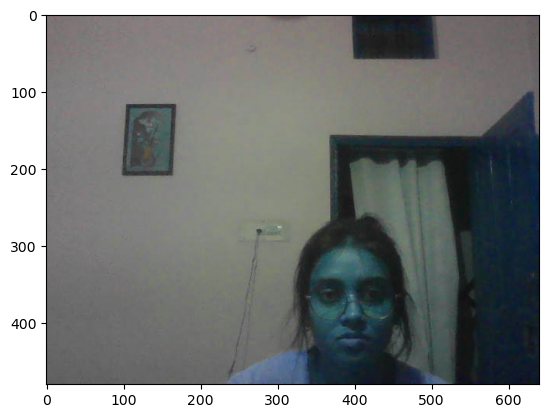

In [12]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [11]:
img = frame.copy()

In [10]:
img.shape

TensorShape([1, 192, 192, 3])

In [8]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Reshape Image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    #Setup input and output
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #Make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    #Rendering
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    #Display the frame
    cv2.imshow('Gesture Detection', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [13]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [14]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [15]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

347 399 0.4538780748844147
327 425 0.4621512293815613
330 370 0.5764433145523071
343 452 0.5834886431694031
345 337 0.726071834564209
426 491 0.4043942391872406
409 280 0.4547368884086609
461 559 0.018249154090881348
457 225 0.027295460924506187
412 497 0.012791832908987999
459 287 0.010733344592154026
354 423 0.013241536915302277
438 180 0.0737607330083847
490 566 0.00957148801535368
410 255 0.04868530109524727
389 642 0.01136203482747078
416 258 0.0048237754963338375


# 3. Draw Keypoints

In [16]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

# 4. Draw Edges

In [17]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [20]:
shaped[0], shaped[1]

(array([347.72094727, 399.7203064 ,   0.45387807]),
 array([327.90693283, 425.42579651,   0.46215123]))

In [21]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(425, 327)
(370, 330)
(452, 343)
(337, 345)
(491, 426)
(280, 409)
(559, 461)
(497, 412)
(225, 457)
(287, 459)
(280, 409)
(423, 354)
(180, 438)
(180, 438)
(566, 490)
(642, 389)
(255, 410)
(258, 416)


In [22]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)